In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load train data
train_df = pd.read_csv(r"C:\Users\JINCY\Desktop\Study Material\DSA\DSA project\credit score classification\train.csv",low_memory=False)

#### About the dataset

ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Month: Represents the month of the year

Name: Represents the name of a person

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual_Income: Represents the annual income of the person

Monthly_Inhand_Salary: Represents the monthly base salary of a person

Num_Bank_Accounts: Represents the number of bank accounts a person holds

Num_Credit_Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num_of_Loan: Represents the number of loans taken from the bank

Type_of_Loan: Represents the types of loan taken by a person

Delay_from_due_date: Represents the average number of days delayed from the payment date

Num_of_delayed_Payment: Represents the average number of payments delayed by a person

Changed_Credit_Limit: Represents the percentage change in credit card limit

Num_Credit_Inquiries: Represents the number of credit card inquiries

Credit_Mix: Represents the classification of the mix of credits

Outstanding_Debt: Represents the remaining debt to be paid (in USD)

Credit_Utilization_Ratio: Represents the utilization ratio of credit card

Credit_History_Age: Represents the age of credit history of the person

Payment_of_Min_Amount: Represents whether only the minimum amount was paid by the person

Total_EMI_per_Month : Represents the monthly EMI amount paid by the person

Amount_invested_monthly: Represents the monthly amount invested by the customer (in USD)

Payment_Behaviour: Represents the payment behavior of the customer (in USD)

Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

In [3]:
# resize data
train_df = train_df[:8000] 

In [4]:
train_df.shape

(8000, 28)

In [5]:
train_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0x44d9,CUS_0xb591,April,Prasadc,52_,356-12-8113,Lawyer,35724.37,3149.030833,5,...,_,18.29,34.545915,25 Years and 0 Months,No,86.135097,69.82077261,High_spent_Small_value_payments,418.9472134,Poor
7996,0x44da,CUS_0xb591,May,NaN,52,356-12-8113,Lawyer,35724.37,NaN,5,...,Good,18.29,27.779343,25 Years and 1 Months,No,86.135097,189.7084045,Low_spent_Large_value_payments,309.0595815,Poor
7997,0x44db,CUS_0xb591,June,Prasadc,52,356-12-8113,Lawyer,35724.37,3149.030833,5,...,Good,18.29,39.153719,25 Years and 2 Months,No,86.135097,73.40766144,High_spent_Large_value_payments,395.3603245,Standard
7998,0x44dc,CUS_0xb591,July,Prasadc,52,356-12-8113,_______,35724.37_,3149.030833,5,...,_,18.29,33.486230,NaN,No,86.135097,85.76795001,High_spent_Small_value_payments,403.000036,Poor


In [6]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [7]:
# check for null values
train_df.isna().sum() 

ID                             0
Customer_ID                    0
Month                          0
Name                         793
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       1177
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                 952
Delay_from_due_date            0
Num_of_Delayed_Payment       560
Changed_Credit_Limit           0
Num_Credit_Inquiries         159
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age           741
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      337
Payment_Behaviour              0
Monthly_Balance              105
Credit_Score                   0
dtype: int64

There are null values in 
- Name 
- Monthly_Inhand_Salary 
- Type_of_Loan 
- Num_of_Delayed_Payment
- Num_Credit_Inquiries
- Credit_History_Age
- Amount_invested_monthly
- Monthly_Balance 

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8000 non-null   object 
 1   Customer_ID               8000 non-null   object 
 2   Month                     8000 non-null   object 
 3   Name                      7207 non-null   object 
 4   Age                       8000 non-null   object 
 5   SSN                       8000 non-null   object 
 6   Occupation                8000 non-null   object 
 7   Annual_Income             8000 non-null   object 
 8   Monthly_Inhand_Salary     6823 non-null   float64
 9   Num_Bank_Accounts         8000 non-null   int64  
 10  Num_Credit_Card           8000 non-null   int64  
 11  Interest_Rate             8000 non-null   int64  
 12  Num_of_Loan               8000 non-null   object 
 13  Type_of_Loan              7048 non-null   object 
 14  Delay_fr

In [9]:
train_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,6823.000000,8000.000000,8000.000000,8000.000000,8000.000000,7841.000000,8000.000000,8000.000000
mean,4299.166681,17.031125,24.076750,73.933875,21.642625,23.061599,32.312193,1374.858962
std,3202.084855,119.001557,138.319615,466.972928,14.749478,166.795965,5.169516,8159.149111
min,355.208333,0.000000,0.000000,1.000000,-5.000000,0.000000,20.172942,0.000000
25%,1698.773333,3.000000,4.000000,7.000000,11.000000,3.000000,27.980463,29.485471
50%,3211.081667,6.000000,5.000000,14.000000,19.000000,5.000000,32.330276,69.717948
75%,5978.466667,8.000000,7.000000,20.000000,29.000000,9.000000,36.593778,167.081471
max,14828.983330,1777.000000,1486.000000,5721.000000,67.000000,2592.000000,48.247003,82204.000000


#### 1 . Removing symbols/characters present in rows

In [10]:
# identify numerical columns with symbols present in rows
train_df.select_dtypes(include='object').columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Columns that should be of numeric datatype:
- Age
- Annual_Income
- Num_of_Loan
- Num_of_Delayed_Payment
- Changed_Credit_Limit
- Outstanding_Debt
- Amount_invested_monthly
- Monthly_Balance

In [11]:
# select those 8 columns
convert_cols = ['Age',
       'Annual_Income', 'Num_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Outstanding_Debt', 
       'Amount_invested_monthly','Monthly_Balance']

In [12]:
# check unique values in all columns
for col in train_df.columns:
    print(f"\n{col}\n",train_df[col].unique())


ID
 ['0x1602' '0x1603' '0x1604' ... '0x44db' '0x44dc' '0x44dd']

Customer_ID
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' 'CUS_0xb891' 'CUS_0x1cdb'
 'CUS_0x95ee' 'CUS_0x284a' 'CUS_0x5407' 'CUS_0x4157' 'CUS_0xba08'
 'CUS_0xa66b' 'CUS_0xc0ab' 'CUS_0x3e45' 'CUS_0x6c66' 'CUS_0xff4'
 'CUS_0x33d2' 'CUS_0x6070' 'CUS_0xfdb' 'CUS_0x3553' 'CUS_0x4100'
 'CUS_0x132f' 'CUS_0xa16e' 'CUS_0xac86' 'CUS_0x5b48' 'CUS_0xa5f9'
 'CUS_0x4d43' 'CUS_0xb95f' 'CUS_0x3edc' 'CUS_0xbffe' 'CUS_0xb681'
 'CUS_0x9a71' 'CUS_0x6048' 'CUS_0x95b5' 'CUS_0x4004' 'CUS_0xb101'
 'CUS_0x9b94' 'CUS_0x4080' 'CUS_0x706a' 'CUS_0x42ac' 'CUS_0x571f'
 'CUS_0xb5ff' 'CUS_0x6a1b' 'CUS_0x9bc1' 'CUS_0xc65' 'CUS_0xaedb'
 'CUS_0x8e9b' 'CUS_0x609d' 'CUS_0x75c6' 'CUS_0x9b3c' 'CUS_0x22a3'
 'CUS_0xb14' 'CUS_0xb986' 'CUS_0xbe1b' 'CUS_0x9ce6' 'CUS_0x6ffb'
 'CUS_0x4315' 'CUS_0x3f5b' 'CUS_0x9d78' 'CUS_0x47db' 'CUS_0x8f17'
 'CUS_0x7d0b' 'CUS_0x7504' 'CUS_0x774' 'CUS_0x9f70' 'CUS_0xab76'
 'CUS_0x5cdf' 'CUS_0x2184' 'CUS_0xa156' 'CUS_0x74f2' 'CUS_0x308b'
 'C

In [13]:
#remove unwanted characters from the selected columns using for loop
for col in convert_cols:  
    train_df[col] = train_df[col].str.strip('-_') #removes - and _ from beginning and end of values

In [14]:
for col in train_df.columns:
    print(f"\n{col}\n",train_df[col].unique())


ID
 ['0x1602' '0x1603' '0x1604' ... '0x44db' '0x44dc' '0x44dd']

Customer_ID
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' 'CUS_0xb891' 'CUS_0x1cdb'
 'CUS_0x95ee' 'CUS_0x284a' 'CUS_0x5407' 'CUS_0x4157' 'CUS_0xba08'
 'CUS_0xa66b' 'CUS_0xc0ab' 'CUS_0x3e45' 'CUS_0x6c66' 'CUS_0xff4'
 'CUS_0x33d2' 'CUS_0x6070' 'CUS_0xfdb' 'CUS_0x3553' 'CUS_0x4100'
 'CUS_0x132f' 'CUS_0xa16e' 'CUS_0xac86' 'CUS_0x5b48' 'CUS_0xa5f9'
 'CUS_0x4d43' 'CUS_0xb95f' 'CUS_0x3edc' 'CUS_0xbffe' 'CUS_0xb681'
 'CUS_0x9a71' 'CUS_0x6048' 'CUS_0x95b5' 'CUS_0x4004' 'CUS_0xb101'
 'CUS_0x9b94' 'CUS_0x4080' 'CUS_0x706a' 'CUS_0x42ac' 'CUS_0x571f'
 'CUS_0xb5ff' 'CUS_0x6a1b' 'CUS_0x9bc1' 'CUS_0xc65' 'CUS_0xaedb'
 'CUS_0x8e9b' 'CUS_0x609d' 'CUS_0x75c6' 'CUS_0x9b3c' 'CUS_0x22a3'
 'CUS_0xb14' 'CUS_0xb986' 'CUS_0xbe1b' 'CUS_0x9ce6' 'CUS_0x6ffb'
 'CUS_0x4315' 'CUS_0x3f5b' 'CUS_0x9d78' 'CUS_0x47db' 'CUS_0x8f17'
 'CUS_0x7d0b' 'CUS_0x7504' 'CUS_0x774' 'CUS_0x9f70' 'CUS_0xab76'
 'CUS_0x5cdf' 'CUS_0x2184' 'CUS_0xa156' 'CUS_0x74f2' 'CUS_0x308b'
 'C

In [15]:
# remove unwanted characters from rest of the columns
# replace empty row with nan
# to apply the changes to whole dataframe
train_df.replace('', np.NaN, inplace=True) 
train_df.replace('_______', np.NaN, inplace=True)


#### 2. Convert the datatype to int/ float for above columns

In [16]:
train_df['Age']=train_df['Age'].astype(int)
train_df['Annual_Income']=train_df['Annual_Income'].astype(float)
train_df['Num_of_Loan']=train_df['Num_of_Loan'].astype(int)
train_df['Num_of_Delayed_Payment']=train_df['Num_of_Delayed_Payment'].astype(float)
train_df['Changed_Credit_Limit']=train_df['Changed_Credit_Limit'].astype(float)
train_df['Outstanding_Debt'] = train_df['Outstanding_Debt'].astype(float)
train_df['Amount_invested_monthly']=train_df['Amount_invested_monthly'].astype(float)
train_df['Monthly_Balance'] =train_df['Monthly_Balance'].astype(float)

In [17]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [18]:
train_df.nunique()

ID                          8000
Customer_ID                 1000
Month                          8
Name                         980
Age                          216
SSN                         1001
Occupation                    15
Annual_Income               1086
Monthly_Inhand_Salary       1053
Num_Bank_Accounts            107
Num_Credit_Card              183
Interest_Rate                205
Num_of_Loan                   51
Type_of_Loan                 673
Delay_from_due_date           73
Num_of_Delayed_Payment        89
Changed_Credit_Limit        1513
Num_Credit_Inquiries         128
Credit_Mix                     4
Outstanding_Debt             998
Credit_Utilization_Ratio    8000
Credit_History_Age           404
Payment_of_Min_Amount          3
Total_EMI_per_month         1190
Amount_invested_monthly     7308
Payment_Behaviour              7
Monthly_Balance             7895
Credit_Score                   3
dtype: int64

In [19]:
# can drop ID, Name and SSN as they are identifiers and not useful for visualization
train_df1 = train_df.drop(['ID', 'Name', 'SSN'], axis=1)

In [20]:
train_df1.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [21]:
train_df1['Credit_Mix'].unique() 

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [22]:
train_df1['Credit_Mix'] = train_df1['Credit_Mix'].replace('_', np.nan)

In [23]:
train_df1['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [24]:
# replace error value with nan
train_df1['Payment_Behaviour'] = train_df1['Payment_Behaviour'].replace('!@9#%8', np.nan)

In [25]:
train_df1.isna().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                   563
Annual_Income                  0
Monthly_Inhand_Salary       1177
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                 952
Delay_from_due_date            0
Num_of_Delayed_Payment       560
Changed_Credit_Limit         165
Num_Credit_Inquiries         159
Credit_Mix                  1616
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age           741
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      337
Payment_Behaviour            636
Monthly_Balance              105
Credit_Score                   0
dtype: int64

### Univariate analysis

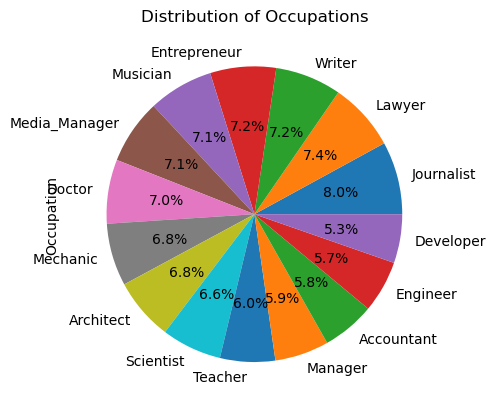

In [26]:
#Occupation
train_df1['Occupation'].value_counts().plot.pie(autopct='%.1f%%')
plt.title("Distribution of Occupations")
plt.show() 

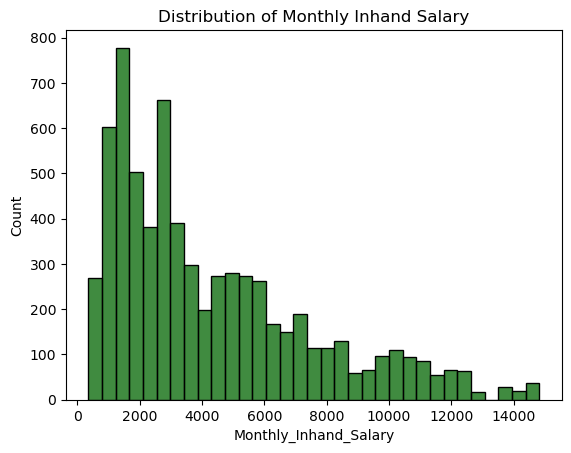

In [27]:
sns.histplot(train_df1['Monthly_Inhand_Salary'], color='darkgreen')
plt.title('Distribution of Monthly Inhand Salary')
plt.show()

The inhand salary distribution is right-skewed. Mean > median. Most of the customers have inhand salary in the range of 1000-5000 dollars.

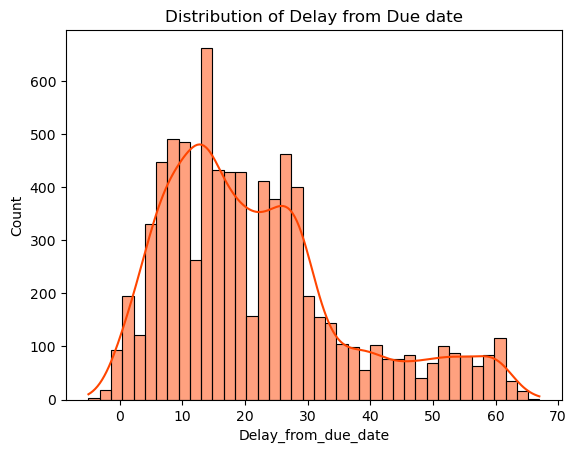

In [28]:
sns.histplot(train_df1['Delay_from_due_date'], kde=True,color='orangered')
plt.title('Distribution of Delay from Due date')
plt.show()


Majority of customers did payment after due date.Only few paid before the due date (-ve values). 
KDE (Kernel Density Estimate) - A smooth curve showing continuous probability density.

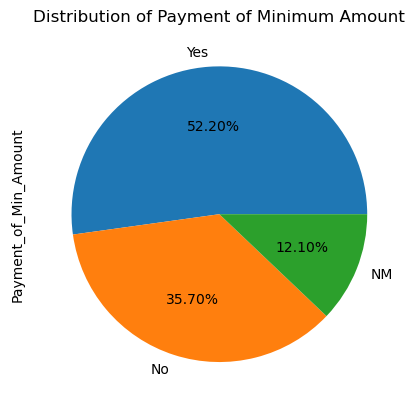

In [29]:
train_df1['Payment_of_Min_Amount'].value_counts().plot.pie(autopct='%.2f%%')
plt.title("Distribution of Payment of Minimum Amount")
plt.show() # check if only the minimum amount was paid 

Most of the Customers (more than 50%), paid only the minimum amount.

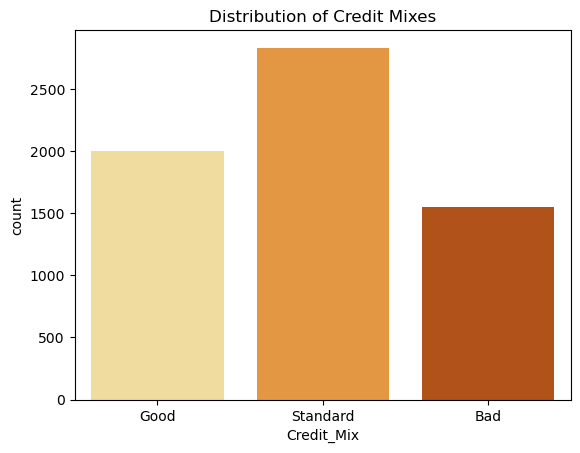

In [30]:
sns.countplot(x= train_df1['Credit_Mix'], palette="YlOrBr") 
#different types of credit accounts of a customer, shows the ability to handle multiple credits
plt.title("Distribution of Credit Mixes")
plt.show()

Majority of credit mix type is standard.

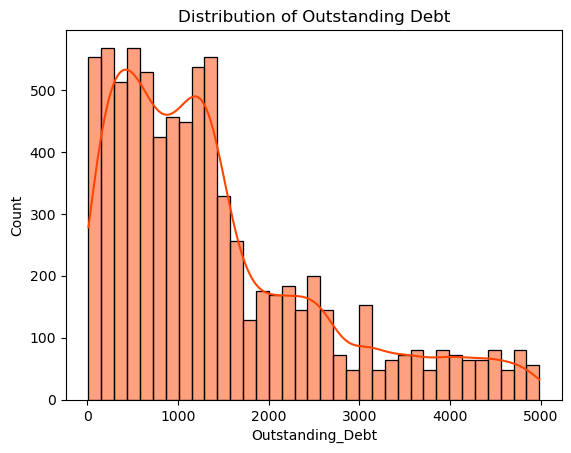

In [31]:
sns.histplot(train_df1['Outstanding_Debt'], kde=True, color='orangered')# debt left to be paid
plt.title('Distribution of Outstanding Debt')
plt.show()

The distribution is skewed to the right. Most people have less amount of debt left to be paid.

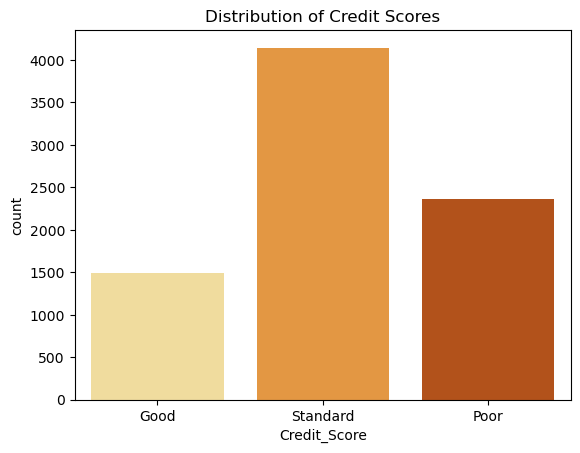

In [32]:
sns.countplot(x= train_df1['Credit_Score'],palette="YlOrBr")
plt.title('Distribution of Credit Scores')
plt.show()


There is an uneven distribution of target column values.

### Bivariate analysis (w.r.t. target)

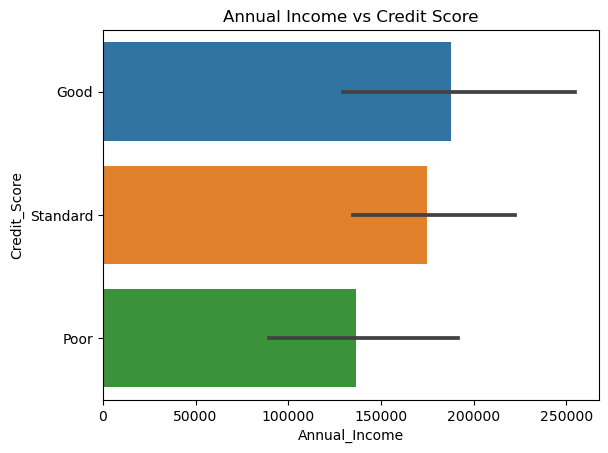

In [33]:
# Annual_Income vs credit score
sns.barplot(x=train_df1['Annual_Income'], y=train_df1['Credit_Score'])
plt.title('Annual Income vs Credit Score')
plt.show()

Customers with higher annual income tend to have better credit scores.

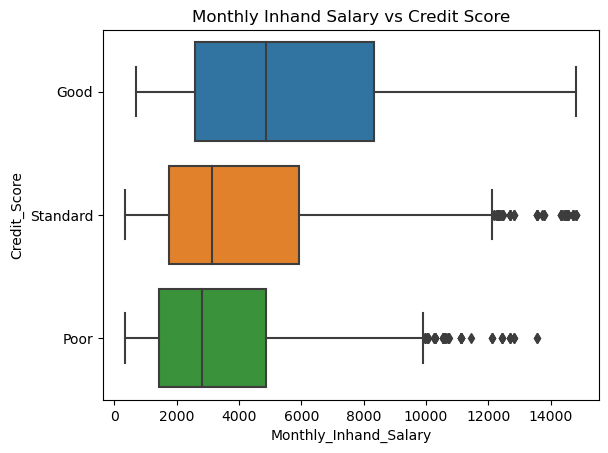

In [34]:
# Monthly_Inhand_Salary vs credit scores
sns.boxplot(y=train_df1['Credit_Score'], x=train_df1['Monthly_Inhand_Salary'])
plt.title('Monthly Inhand Salary vs Credit Score')
plt.show()

The distribution is right skewed(mean>median) for all three credit scorers.Customers with higher monlthy inhand salary are showing better credit scores.

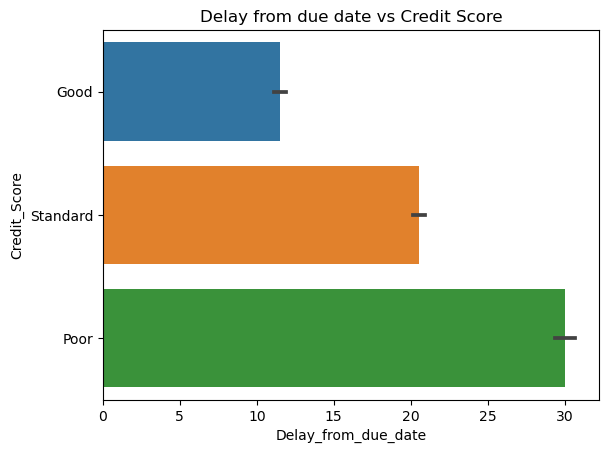

In [35]:
# Delay_from_due_date vs credit score
sns.barplot(y=train_df1['Credit_Score'], x=train_df1['Delay_from_due_date'])
plt.title('Delay from due date vs Credit Score')
plt.show()

Credit scores get poorer as delay from due date increases.

Credit_Score  Good  Poor  Standard
Credit_Mix                        
Bad             20   939       593
Good          1022   322       656
Standard       160   633      2039


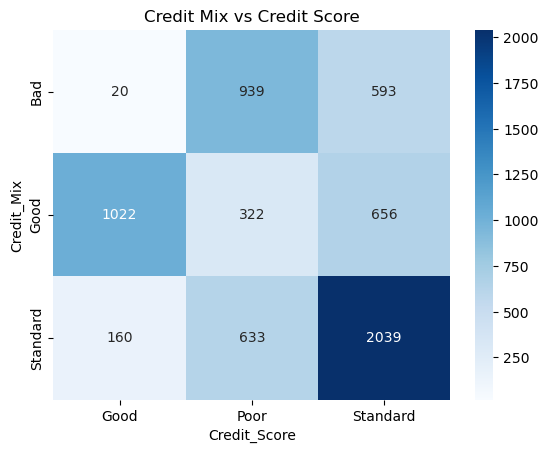

In [36]:
# Credit_Mix vs Credit scores
cat_var = pd.crosstab(train_df1.Credit_Mix, train_df1.Credit_Score)
print(cat_var)
sns.heatmap(cat_var, annot=True,fmt='.4g',cmap='Blues')
plt.title('Credit Mix vs Credit Score')
plt.show()

Customers with better credit mix, shows better credit scores.

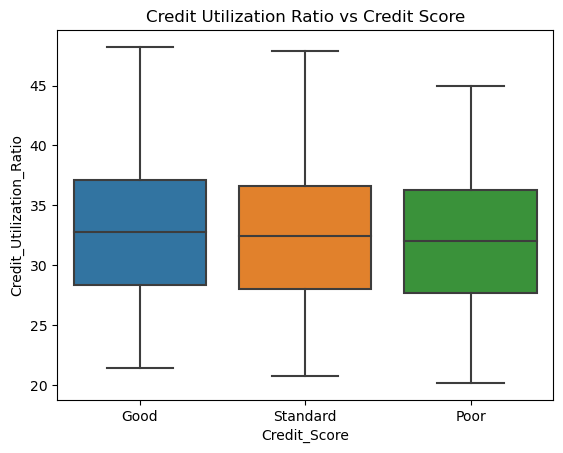

In [37]:
#Credit_Utilization_Ratio vs Credit score
sns.boxplot(y=train_df1['Credit_Utilization_Ratio'], x=train_df1['Credit_Score'])
plt.title('Credit Utilization Ratio vs Credit Score')
plt.show()

Credit Utilization ratio distribution is almost even for good andstandard credit scorers.But, the range is slightly lower for poor category.

Credit_Score           Good  Poor  Standard
Payment_of_Min_Amount                      
NM                      200   304       464
No                     1130   410      1316
Yes                     163  1646      2367


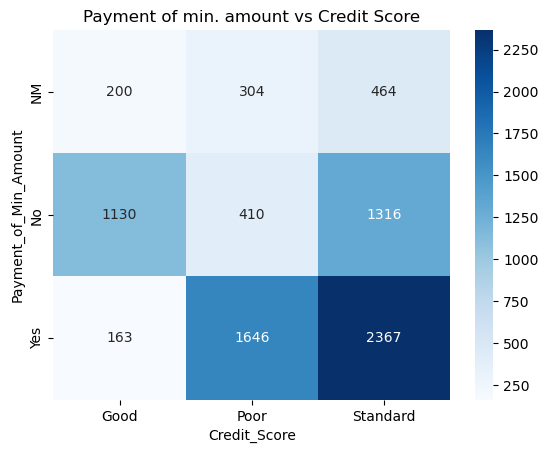

In [38]:
# Payment_of_Min_Amount vs credit score
cat_var1 = pd.crosstab(train_df1.Payment_of_Min_Amount, train_df1.Credit_Score)
print(cat_var1)
sns.heatmap(cat_var1, annot=True,fmt='.4g', cmap="Blues")
plt.title('Payment of min. amount vs Credit Score')
plt.show()

Most of the Customers with poor and standard credit scores made only the minimum payment. Most of the customers with good credits scores, made more than the minimum payment.

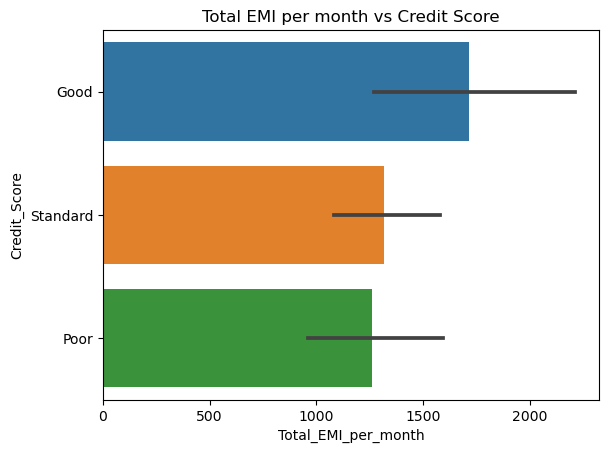

In [39]:
#Total_EMI_per_month vs credit scores
sns.barplot(x=train_df1['Total_EMI_per_month'], y=train_df1['Credit_Score'])
plt.title('Total EMI per month vs Credit Score')
plt.show()

As the EMI paid by the customer increase, credit scores also become better.